In [1]:
import numpy as np  # NumPy for arrays
import torch  # PyTorch for tensors
import torch.nn as nn  # Neural network module
from torch.utils.data import DataLoader, TensorDataset  # Data loading utilities
import torch.optim as optim
import matplotlib.pyplot as plt  # For plotting
from matplotlib import cm  # Colormap for plots
import torch.optim.lr_scheduler as lr_scheduler

In [2]:
fontsize= 16
ticksize = 14
figsize = (10, 6)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

# Data Generating Process

In [3]:
def dgp_y(x):
    y = 2*(1-torch.exp(-torch.abs(x+torch.sin(x**2))))
    return y

In [4]:
x_train = torch.arange(0,6,0.5).unsqueeze(dim=1)
y_train = dgp_y(x_train)
x_test = torch.arange(0,6,0.01).unsqueeze(dim=1)
y_test = dgp_y(x_test)

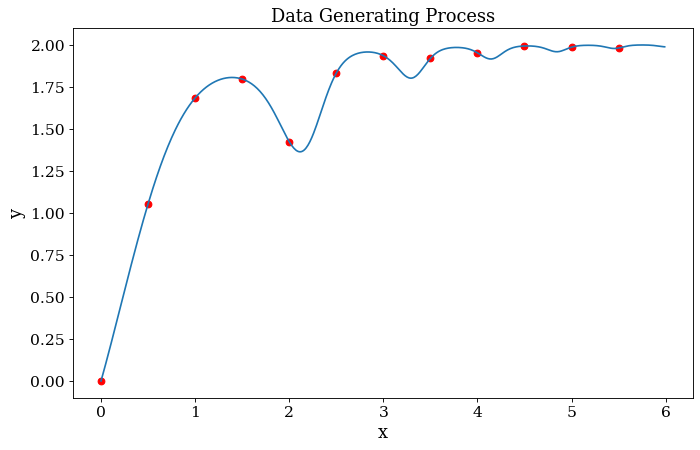

In [5]:
plt.scatter(x_train,y_train, color = "r")
plt.plot(x_test,y_test)
plt.title("Data Generating Process")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Training procedure

## Setting up the neural network

In [6]:
class NN(nn.Module):
    def __init__(self,
                 dim_hidden = 128):
        super().__init__()
        torch.manual_seed(123)  # Replace 123 with your desired seed
        self.dim_hidden= dim_hidden
        
        self.y = nn.Sequential(
            nn.Linear(1, dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden, 1),
        )

    def forward(self, x):
        return self.y(x)

In [7]:
def count_parameters(model):
    """
    Counts the number of trainable weights and biases in the neural network.

    Parameters:
    - model: The PyTorch model

    Returns:
    - total_params: The total number of parameters (weights + biases)
    """
    total_params = 0
    for param in model.parameters():
        total_params += param.numel()  # numel() returns the total number of elements (weights/biases) in the parameter
    return total_params

model = NN(dim_hidden = 128)

count_parameters(model)

33409

## setting up the data loader (outside of the training loop)

In [8]:
batch_size = x_train.shape[0] # We are going full batch
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle= False)

## Trining loop

### Training model 1: dime_hidden = 128

In [9]:
criterion = nn.MSELoss()


In [10]:
model_1 = NN(dim_hidden = 128)
print("number of parameters=",count_parameters(model_1))

number of parameters= 33409


In [11]:
num_epochs = 15000
lr = 0.01

In [12]:
optimizer_1 = optim.Adam(model_1.parameters(), lr=lr)
scheduler_1 = lr_scheduler.StepLR(optimizer_1, step_size=500, gamma=0.9)
for epoch in range(num_epochs):
    for x_batch, y_batch in train_loader:
        optimizer_1.zero_grad()
        y_hat = model_1(x_batch)
        loss = criterion(y_hat, y_batch)
        loss.backward()
        optimizer_1.step()
    scheduler_1.step()  
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.7f}')

y_hat_1 = model_1(x_test).detach()

Epoch [1000/15000], Loss: 0.0012726
Epoch [2000/15000], Loss: 0.0000008
Epoch [3000/15000], Loss: 0.0008482
Epoch [4000/15000], Loss: 0.0000001
Epoch [5000/15000], Loss: 0.0001844
Epoch [6000/15000], Loss: 0.0000000
Epoch [7000/15000], Loss: 0.0000097
Epoch [8000/15000], Loss: 0.0000000
Epoch [9000/15000], Loss: 0.0000008
Epoch [10000/15000], Loss: 0.0000000
Epoch [11000/15000], Loss: 0.0000000
Epoch [12000/15000], Loss: 0.0000002
Epoch [13000/15000], Loss: 0.0000000
Epoch [14000/15000], Loss: 0.0000000
Epoch [15000/15000], Loss: 0.0000000


### Training model 2: dime_hidden = 400

In [13]:
model_2 = NN(dim_hidden = 400)
print("number of parameters=",count_parameters(model_2))

number of parameters= 322001


In [16]:
optimizer_2 = optim.Adam(model_2.parameters(), lr=lr)
scheduler_2 = lr_scheduler.StepLR(optimizer_2, step_size=500, gamma=0.9)
for epoch in range(num_epochs):
    for x_batch, y_batch in train_loader:
        optimizer_2.zero_grad()
        y_hat = model_2(x_batch)
        loss = criterion(y_hat, y_batch)
        loss.backward()
        optimizer_2.step()
    scheduler_2.step()  
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.7f}')

y_hat_2 = model_2(x_test).detach()

Epoch [1000/15000], Loss: 0.0000409
Epoch [2000/15000], Loss: 0.0000108
Epoch [3000/15000], Loss: 0.0000031
Epoch [4000/15000], Loss: 0.0000003
Epoch [5000/15000], Loss: 0.0000092
Epoch [6000/15000], Loss: 0.0000105
Epoch [7000/15000], Loss: 0.0001484
Epoch [8000/15000], Loss: 0.0000813
Epoch [9000/15000], Loss: 0.0000004
Epoch [10000/15000], Loss: 0.0000001
Epoch [11000/15000], Loss: 0.0001594
Epoch [12000/15000], Loss: 0.0000000
Epoch [13000/15000], Loss: 0.0000000
Epoch [14000/15000], Loss: 0.0000000
Epoch [15000/15000], Loss: 0.0000000


# Plotting the results

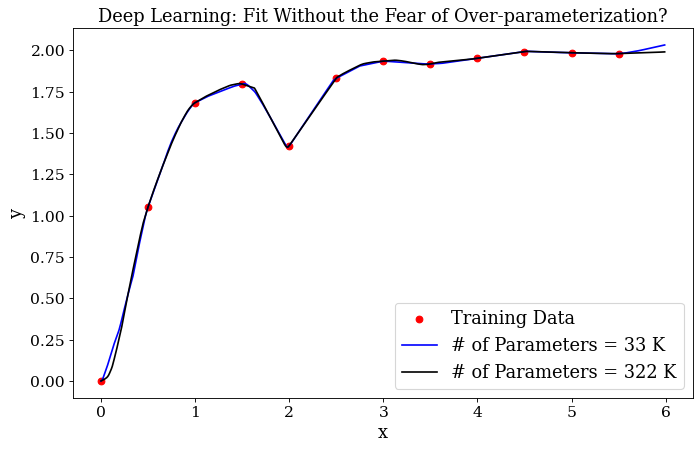

In [29]:
plt.scatter(x_train,y_train, color = "r", label = "Training Data")
plt.plot(x_test,y_hat_1, color = "blue", label = "# of Parameters = 33 K")
plt.plot(x_test,y_hat_2, color = "black",label = "# of Parameters = 322 K")
plt.legend(loc='best')
plt.title("Deep Learning: Fit Without the Fear of Over-parameterization?")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('smooth_interpolation_33_vs_322.pdf')


In [ ]:
lr